In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'a':[]}

In [4]:
lr = 1.0e-5
g = 2
lora_alpha = 4
r = 8
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {lora_alpha}')
data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['a'].append(lora_alpha)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05. Focal loss gamma: 2. Weight decay 0.0. Lora rank: 8. Lora alpha: 4


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1824	Val Loss:	0.7066	Accuracy:	0.2691	F1:	0.2251
2 / 30: Train Loss:	0.1768	Val Loss:	0.7006	Accuracy:	0.3479	F1:	0.3336
3 / 30: Train Loss:	0.1745	Val Loss:	0.6965	Accuracy:	0.4464	F1:	0.4451
4 / 30: Train Loss:	0.1728	Val Loss:	0.6954	Accuracy:	0.4945	F1:	0.4937
5 / 30: Train Loss:	0.1722	Val Loss:	0.6942	Accuracy:	0.4858	F1:	0.4855
6 / 30: Train Loss:	0.1704	Val Loss:	0.6896	Accuracy:	0.5339	F1:	0.5310
7 / 30: Train Loss:	0.1673	Val Loss:	0.6796	Accuracy:	0.6455	F1:	0.6265
8 / 30: Train Loss:	0.1668	Val Loss:	0.6827	Accuracy:	0.6018	F1:	0.5925
9 / 30: Train Loss:	0.1641	Val Loss:	0.6653	Accuracy:	0.7024	F1:	0.6637
10 / 30: Train Loss:	0.1590	Val Loss:	0.6496	Accuracy:	0.7330	F1:	0.6834
11 / 30: Train Loss:	0.1535	Val Loss:	0.6354	Accuracy:	0.7571	F1:	0.6996
12 / 30: Train Loss:	0.1532	Val Loss:	0.6200	Accuracy:	0.7593	F1:	0.6941
13 / 30: Train Loss:	0.1531	Val Loss:	0.6179	Accuracy:	0.7659	F1:	0.7169
14 / 30: Train Loss:	0.1481	Val Loss:	0.6085	Accuracy:	0.772

In [4]:
lr = 1.0e-5
g = 2
lora_alpha = 16
r = 8
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {lora_alpha}')
data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['a'].append(lora_alpha)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05. Focal loss gamma: 2. Weight decay 0.0. Lora rank: 8. Lora alpha: 16


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1824	Val Loss:	0.7061	Accuracy:	0.2713	F1:	0.2282
2 / 30: Train Loss:	0.1765	Val Loss:	0.6995	Accuracy:	0.3654	F1:	0.3547
3 / 30: Train Loss:	0.1741	Val Loss:	0.6953	Accuracy:	0.4530	F1:	0.4520
4 / 30: Train Loss:	0.1720	Val Loss:	0.6927	Accuracy:	0.5230	F1:	0.5202
5 / 30: Train Loss:	0.1703	Val Loss:	0.6873	Accuracy:	0.5689	F1:	0.5608
6 / 30: Train Loss:	0.1661	Val Loss:	0.6689	Accuracy:	0.7024	F1:	0.6681
7 / 30: Train Loss:	0.1580	Val Loss:	0.6359	Accuracy:	0.7462	F1:	0.6882
8 / 30: Train Loss:	0.1559	Val Loss:	0.6305	Accuracy:	0.7396	F1:	0.6943
9 / 30: Train Loss:	0.1491	Val Loss:	0.5961	Accuracy:	0.7702	F1:	0.7171
10 / 30: Train Loss:	0.1430	Val Loss:	0.5673	Accuracy:	0.7746	F1:	0.7143
11 / 30: Train Loss:	0.1369	Val Loss:	0.5629	Accuracy:	0.7812	F1:	0.7261
12 / 30: Train Loss:	0.1384	Val Loss:	0.5482	Accuracy:	0.7943	F1:	0.7358
13 / 30: Train Loss:	0.1357	Val Loss:	0.5491	Accuracy:	0.8053	F1:	0.7646
14 / 30: Train Loss:	0.1298	Val Loss:	0.5462	Accuracy:	0.792

In [4]:
lr = 1.0e-5
g = 2
lora_alpha = 32
r = 8
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {lora_alpha}')
data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['a'].append(lora_alpha)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05. Focal loss gamma: 2. Weight decay 0.0. Lora rank: 8. Lora alpha: 32


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1823	Val Loss:	0.7054	Accuracy:	0.2713	F1:	0.2282
2 / 30: Train Loss:	0.1763	Val Loss:	0.6985	Accuracy:	0.3786	F1:	0.3701
3 / 30: Train Loss:	0.1737	Val Loss:	0.6933	Accuracy:	0.4836	F1:	0.4836
4 / 30: Train Loss:	0.1705	Val Loss:	0.6875	Accuracy:	0.5755	F1:	0.5673
5 / 30: Train Loss:	0.1666	Val Loss:	0.6640	Accuracy:	0.7068	F1:	0.6698
6 / 30: Train Loss:	0.1582	Val Loss:	0.6151	Accuracy:	0.7615	F1:	0.6912
7 / 30: Train Loss:	0.1469	Val Loss:	0.5833	Accuracy:	0.7746	F1:	0.7185
8 / 30: Train Loss:	0.1483	Val Loss:	0.5909	Accuracy:	0.7637	F1:	0.7220
9 / 30: Train Loss:	0.1398	Val Loss:	0.5517	Accuracy:	0.7877	F1:	0.7375
10 / 30: Train Loss:	0.1333	Val Loss:	0.5261	Accuracy:	0.8206	F1:	0.7671
11 / 30: Train Loss:	0.1274	Val Loss:	0.5237	Accuracy:	0.8228	F1:	0.7764
12 / 30: Train Loss:	0.1292	Val Loss:	0.5049	Accuracy:	0.8381	F1:	0.7825
13 / 30: Train Loss:	0.1235	Val Loss:	0.5137	Accuracy:	0.8381	F1:	0.8029
14 / 30: Train Loss:	0.1197	Val Loss:	0.5022	Accuracy:	0.835

In [8]:
results = {'acc': [0.75,0.76171875,0.78515625,0.8046875], 'f1': [0.698268876611418,0.7236644193165933,0.7375827043146025,0.7519956599240487], 'a': [4,8,16,32]}

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

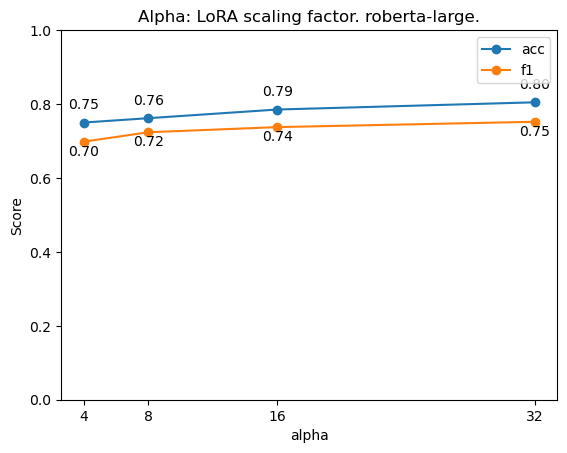

In [10]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='a', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["a"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["a"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['a'], [val for val in df['a']], ha='center')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Alpha: LoRA scaling factor. {model_checkpoint}.')